# Generating Embedded Diagrams

This notebook installs - and tests - a wide variety of packages that support the creation of a range of technical drawings.

This includes, but is not limited to, diagrams that are relevant to the teaching and communications of electronics related subject matter as well as diagrams we might find in a mechanics or geometry/trigonometry courses.

Typically, we would preinstall these required drawing component packages into a custom environment to be used by module team members, students, or researchers so that they could be used directly and without any further installation requirements.

The examples in this notebook are generated using the *LaTeX* `tikz` package. As well as Jupyter notebooks, other interactive authoring environments allow you to write - and preview - documents capable of creating `tickz` scripted diagrams. For example: [Overleaf](https://www.overleaf.com).

## `tikz_magic`

This piece of IPython magic supports the creation of electronic circuit and control diagrams using various LaTeX packages including:

- `circuitikz`
- `bloques`

The following cell may take some time to run as it installs the required components (it only needs to be run once per notebook session).

In [ ]:
%%capture
#Try to load in the magic - if we can't, check everything we need is installed and try again
try:
    %load_ext tikz_magic
except:
    #There's an overhead in splitting these into separate installs
    # but conda just seems to hang forever if I try to do both in the same command.
    # That said, splitting the two doesn't always seem to help either.
    # This notebook really needs to be run in something like Binderhub
    #   with a prebuilt envionment; Azure notebooks is too risky.
    #!conda update -y conda
    !conda install -y -c conda-forge graphviz imagemagick
    !pip install --user git+https://github.com/innovationOUtside/ipython_magic_tikz
    %load_ext tikz_magic

Note that there is a tension associated with using the `tikz` magic. On the one hand, certain boilerplate bits of code can be omitted from the diagram description, with the magic adding them in to generate the output diagram. This means you can focus on the diagram itself. On the other hand, this means that the code in the code cell is not complete and is unlikely to compile in another *LaTeX* environment. That said, it is possible to disable the magic boilerplate wrapper so that all code, that should run elsewhere, is required.

## `circuitikz`

The `circuitikz` *LaTeX* package ([manual](http://texdoc.net/texmf-dist/doc/latex/circuitikz/circuitikzmanual.pdf)) supports the drawing of electrical circuit diagrams. Circuits are constructed by drawing symbols that connect pairs of Cartesian co-ordinates or that:

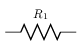

In [2]:
%%tikz -p circuitikz -s 0.3
    %Draw a resistor labelled R_1 connecting points (0,0) and (2,0)
    \draw (0,0) to[R, l=$R_1$] (2,0);

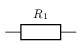

In [6]:
%%tikz -p circuitikz -s 0.3
    %To ward off the "we don't draw resistors like that" cries...
    \ctikzset{resistor = european}
    
    %Draw a resistor labelled R_1 connecting points (0,0) and (2,0)
    \draw (0,0) to[R, l=$R_1$] (2,0);

The requirement to specify co-ordinates means you need to think about the layout - drafting a circuit on graph paper can help with this.

But things may be simplified in maintenance terms if you label co-ordinates and join those.

For example, consider the following circuit:

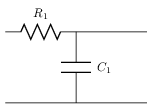

In [5]:
%%tikz -p circuitikz -s 0.3
    %Draw a resistor labelled R_1 connecting points (0,0) and (2,0)
    %Extend the circuit out with a wire to (4,0)
    \draw (0,0) to[R, l=$R_1$] (2,0) -- (4,0);

    %Add a capacitor labelled C_1 connecting points (2,0) and (2,-2)
    \draw (2,0) to[C, l=$C_1$] (2,-2);

    %Add a wire along the bottom
    \draw (0,-2) -- (4,-2);

There are a lot of explicitly set co-ordinate values in there, and it can be hard to see what they refer to. Even with such a simple diagram, making changes to it could become problematic.

In the same way that it is good practice to replace inline numerical values in computer programs with named constants or variables, we can start to make the figure more maintainable by naming nodal points and then connecting these named nodes.

A lot of the set-up looks like it could quickly become boilerplate code that can be reused directly when setting up other diagrams, or perhaps even incorporated into an in-house customised version of the `circuitikz` package.

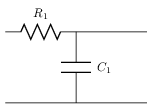

In [18]:
%%tikz -p circuitikz -s 0.3

    %Define some base component size dimensions
    \def\componentSize{2}
    
    %Define the size of the diagram in terms of component width and height
    %That is, how many horizontally aligned components wide is the diagram
    % and how many vertically aligned components high
    \def\componentWidth{2}
    \def\componentHeight{1}

    %Define the y co-ordinate of the top and bottom rails
    \def\toprail{0}
    \def\height{\componentSize * \componentHeight}
    %The co-ordinates are in a Cartesian plane, so "down" is negative...
    \def\bottomrail{\toprail - \height}
    
    %Define the right and left extent x coordinate values    
    \def\leftside{0}
    \def\width{\componentSize * \componentWidth}
    \def\rightside{\leftside + \width}
    
    %Name the coordinate locations of particular nodes
    \coordinate (InTop) at (\leftside,\toprail);
    \coordinate (OutTop) at (\rightside,\toprail);
    \coordinate (InBottom) at (\leftside,\bottomrail);
    \coordinate (OutBottom) at (\rightside,\bottomrail);

    %Draw the top rail
    %Define a convenience x coordinate as the
    %  vertical aligned to the topmost component out
    %The number (1) in the product term below is based on
    %  how many components in from the left we are
    \def\R1outX{1 * \componentSize}

    %Add a resistor labelled R_1
    \coordinate (R1out) at (\R1outX,\toprail);    
    \draw (InTop) to[R, l=$R_1$] (R1out) -- (OutTop);

    %Add a capacitor labelled C_1
    \coordinate (C1out) at (\R1outX,\bottomrail);
    \draw (R1out) to[C, l=$C_1$] (C1out);

    %Draw the bottom rail
    \draw (InBottom) -- (OutBottom);

Some reflections on possible best practice based on observations of the above:

- define named limits on x values to set the width of the diagram, such as `\leftside` and `\rightside`. This can be done by counting the number of components wide the diagram is (if we can assume components have width one).
- name the maximum and minimum height (y) values such as `\toprail` and `\bottomrail`. Again, counting vertically place components may help. Use relative definitions where possible to make the diagram easier to maintain.
- define connections relative to each other to minimise the number of numerical values that need to be set explicitly;
- name points sensibly; if we read the diagram from top left to bottom right, we can make use of easily recognised verticals by using named x coordinate values set relative to the topmost component out x co-ordinates (for example, `\R1outX`) and top leftmost component out y values; full cartesian co-ordinate pairs can then be named relative to nodes associated with top leftmost component outs (for example, `\R1out`).

A wide range of component symbols are available.

Note that the following op-amp circuit really needs rewriting to make it more maintainable.

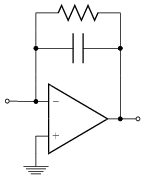

In [3]:
%%tikz -p circuitikz -s 0.3
%Example circuit from: https://tex.stackexchange.com/a/379915
[every pin/.append style={align=left, text=blue}]
  \draw
  (0, 0) node[op amp] (opamp) {}
  (opamp.-) to[short,-o] (-2, 0.5)
  (opamp.-) to[short,*-] ++(0,1.5) coordinate (leftC)
            to[C]           (leftC -| opamp.out)
            to[short,-*]    (opamp.out)
            to[short,-o] ++ (0.5,0)
  (leftC)   to[short,*-] ++ (0,1)  coordinate (leftR) 
            to[R]           (leftR -| opamp.out)
            to[short,-*]    (leftC -| opamp.out)
   (opamp.+) -- ++ (0,-0.5) node[ground] {};

## `bloques`

The `bloques` package ([manual](http://mirror.hmc.edu/ctan/graphics/pgf/contrib/bloques/example.pdf)) supports the creation of block diagrams well suited to generating control style diagrams.

Diagrams are written from left to right using a simple grammar:

- `Start` / `End` / `NewStart`: starting point / end point; the new start allows multiple starts to be defined with co-ordinates specified explicitly;
- `MinusDown` / `PlusDown`: summation circle with plus / minus input from below
- `MinusUp` / `PlusUp`: summation circle with plus / minus input from above
- `Gain`: rectangular gain block
- `GainPlus` / `GainMinus`: rectangular gain block feeding up into a circular sum block

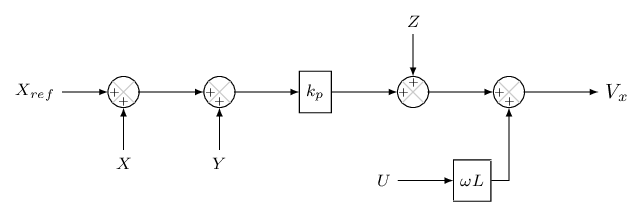

In [6]:
%%tikz -p bloques -s 0.5
    %Improve the styling
    \renewcommand{\ancholinea}{thin}
    
    \bStart{$X_{ref}$}
    \bPlusDown{$X$}
    \bPlusDown{$Y$}
    \bGain{$k_{p}$}[line width=0.1mm]
    \bPlusUp{$Z$}
    \bGainPlus{$U$}{$\omega L$}
    \bEnd{$V_{x}$}

Feedback circuits are also supported. In this case, we need to specify both the start and the end of the feedback line:

- `MinusF` / `PlusF`: where the feedback is fed back into the circuit; this names a node that acts as the feedback re-entry point;
- `FeedBack`: where the feedback is taken from the circuit; the re-entry point must also be provided.

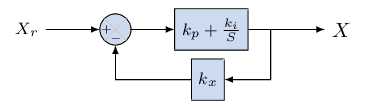

In [5]:
%%tikz -p bloques -s 0.5
    \renewcommand{\ancholinea}{thin}
    \bColorB{blue!70!green!20}
    \bStart{$X_{r}$}
    \bMinusF{NODEX}
    \bGain{$k_{p}+\frac{k_{i}}{S}$}
    \bFeedBack{$k_{x}$}{NODEX}
    \bEnd{$X$}

Gain blocks that cross the diagram can also be used.

- `MarkNodeUp` / `MarkNodeDown`: explicitly label the exit point of the previous node;
- `CrossGain`: gain block that connects two parts of the diagram as specified by explcitly labelled points;

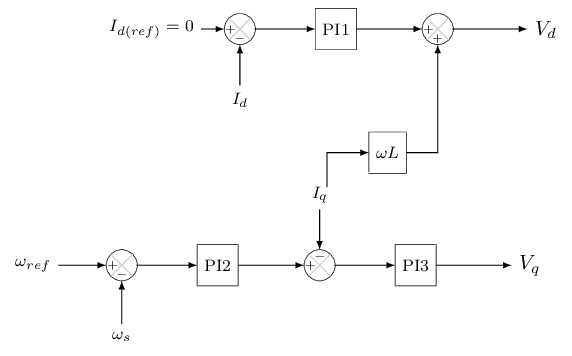

In [8]:
%%tikz -p bloques -s 0.5
    \renewcommand{\ancholinea}{very thin}
    \bStart{$I_{d(ref)}=0$}
    \bMinusDown{$I_{d}$}
    \bGain{PI1}
    \bPlusF{NODET}
    \bEnd{$V_{d}$}
    \bNewStart{$\omega_{ref}$}{(-2,-4)}
    \bMinusDown{$\omega_{s}$}
    \bGain{PI2}
    \bMinusUp{$I_{q}$}
    \bMarkNodeUp{NODEX}
    \bGain{PI3}
    \bEnd{$V_{q}$}
    \bCrossGain{$\omega L$} {NODEX} {NODET}

## Graphviz

A wide range of drawings can be created using Graphviz.

For examples, drawings can be created, and rendered, using the `graphviz` Python package:

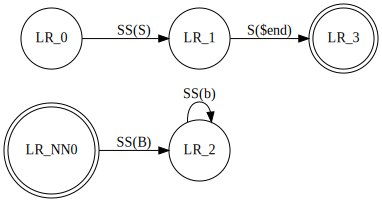

In [7]:
from graphviz import Digraph
f = Digraph('finite_state_machine')
f.attr(rankdir='LR', size='8,5')
f.attr('node', shape='doublecircle')
f.node('LR_NN0') ;f.node('LR_3');
f.attr('node', shape='circle')
f.edge('LR_NN0', 'LR_2', label='SS(B)'); f.edge('LR_0', 'LR_1', label='SS(S)')
f.edge('LR_1', 'LR_3', label='S($end)'); f.edge('LR_2', 'LR_2', label='SS(b)')
f

### Graphviz Magic

Enter `dot` code directly in a cell and then render the associated diagram using Graphviz.

In [8]:
%%capture
!pip install --upgrade git+https://github.com/innovationOUtside/ipython_magic_graphviz.git

In [9]:
%load_ext graphviz_magic

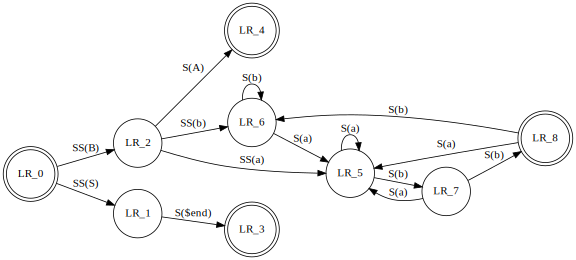

In [10]:
%%dot digraph finite_state_machine {
    rankdir=LR;
    size="8,5"
    node [shape = doublecircle]; LR_0 LR_3 LR_4 LR_8;
    node [shape = circle];
    LR_0 -> LR_2 [ label = "SS(B)" ];
    LR_0 -> LR_1 [ label = "SS(S)" ];
    LR_1 -> LR_3 [ label = "S($end)" ];
    LR_2 -> LR_6 [ label = "SS(b)" ];
    LR_2 -> LR_5 [ label = "SS(a)" ];
    LR_2 -> LR_4 [ label = "S(A)" ];
    LR_5 -> LR_7 [ label = "S(b)" ];
    LR_5 -> LR_5 [ label = "S(a)" ];
    LR_6 -> LR_6 [ label = "S(b)" ];
    LR_6 -> LR_5 [ label = "S(a)" ];
    LR_7 -> LR_8 [ label = "S(b)" ];
    LR_7 -> LR_5 [ label = "S(a)" ];
    LR_8 -> LR_6 [ label = "S(b)" ];
    LR_8 -> LR_5 [ label = "S(a)" ];
}

## Mechanics Diagrams

We can also draw diagrams with more of a physics feel to them, such as diagrams for exploring various mechanical assemblies.

### Mass Damper 

A popular class of diagrams used in teaching mechanics are mass damper diagrams.

The following example is taken from https://tex.stackexchange.com/a/13952, with some additional explanation:

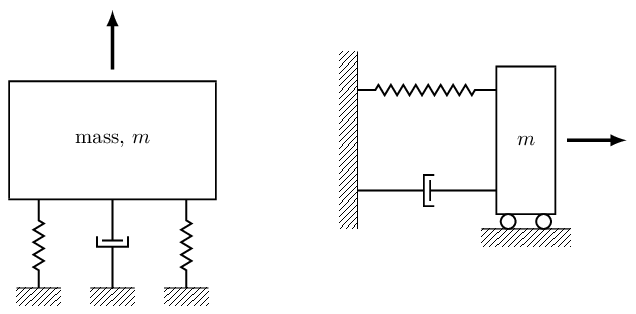

In [15]:
%%tikz --no-wrap -s 0.5
    %Import some required TeX libraries
    \usetikzlibrary{calc,patterns,decorations.pathmorphing,decorations.markings}
    
    % The --no-wrap switch means we have to define the tikzpicture explicitly
    \begin{tikzpicture}[every node/.style={draw,outer sep=0pt,thick}]
    
        %Define some named, styled components
        %We could perhaps define these in a custom, local TeX package
        \tikzstyle{spring}=[thick,decorate,
                            decoration={zigzag, segment length=6,
                                        pre length=0.3cm, post length=0.3cm,}]
        
        \tikzstyle{damper}=[thick,decoration={markings,  
          mark connection node=dmp,
          mark=at position 0.5 with 
          {
            \node (dmp) [thick,inner sep=0pt,transform shape,rotate=-90,
                         minimum width=15pt,minimum height=3pt,draw=none] {};
            \draw [thick] ($(dmp.north east)+(2pt,0)$) -- (dmp.south east) -- (dmp.south west) -- ($(dmp.north west)+(2pt,0)$);
            \draw [thick] ($(dmp.north)+(0,-5pt)$) -- ($(dmp.north)+(0,5pt)$);
          }
        }, decorate]
        
        \tikzstyle{ground}=[fill,pattern=north east lines,draw=none,
                            minimum width=0.75cm,minimum height=0.3cm]

        
        
        
        %Draw the first of two diagrams that will be placed side by side 

        %The first diagram will be of a vertically aligned mass damper system
        
        %Add a mass to the diagram
        \def\Mwidth{3.5cm}
        \def\Mheight{2cm}
        \node (M) [minimum width=\Mwidth,minimum height=\Mheight] {mass, $m$};

        \def\Melevation{1.5cm}
        \def\springoffset{1.25cm}
        
        %Add a grounded spring on the left
        %Draw in the shaded ground
        \node (ground1) at (M.south) [ground,yshift=-\Melevation,xshift=-\springoffset,anchor=north] {};
        %Add a line along the top
        \draw (ground1.north west) -- (ground1.north east);
        %Add the spring
        \draw [spring] (ground1.north) -- ($(M.south east)!(ground1.north)!(M.south west)$);

        %Add a grounded central damper
        \node (ground2) at (M.south) [ground,yshift=-\Melevation,anchor=north] {};
        \draw (ground2.north west) -- (ground2.north east);
        \draw [damper] (ground2.north) -- ($(M.south east)!(ground2.north)!(M.south west)$);

        %Add a grounded spring on the right
        \node (ground3) at (M.south) [ground,yshift=-\Melevation,xshift=\springoffset,anchor=north] {};
        \draw (ground3.north west) -- (ground3.north east);
        \draw [spring] (ground3.north) -- ($(M.south east)!(ground3.north)!(M.south west)$);

        %Add the upward force arrow, slightly offset from the mass
        \draw [-latex,ultra thick] (M.north) ++(0,0.2cm) -- +(0,1cm);

        
        
        
        % Now draw the second diagram in a frame of reference that is placed
        %  to the right of the origin of the diagram above
        \begin{scope}[xshift=7cm]
            \def\Mwidth{1cm}
            \def\Mheight{2.5cm}
            
            %Add the mass
            \node (M) [minimum width=\Mwidth, minimum height=\Mheight] {$m$};

            %Add the ground - and place the mass on circular wheels
            \def\Melevation{0.25cm}
            \node (ground) [ground,anchor=north,yshift=-\Melevation,
                            minimum width=\Mwidth+0.5cm] at (M.south) {};
            \draw (ground.north east) -- (ground.north west);
            \def\wheelradius{\Melevation / 2}
            \draw [thick] (M.south west) ++ (0.2cm,-\wheelradius) circle (\wheelradius)  (M.south east) ++ (-0.2cm,-\wheelradius) circle (\wheelradius);

            %Add the grounding wall - the ground is rotated, so the width becomes the height
            \def\walloffset{-3cm}
            \def\wallheight{\Mheight + 2 * \Melevation}
            \node (wall) [ground, rotate=-90, minimum width=\wallheight,yshift=\walloffset] {};
            \draw (wall.north east) -- (wall.north west);

            %Not sure how this works? Relative to an angle projected on the wall?
            \draw [spring] (wall.170) -- ($(M.north west)!(wall.170)!(M.south west)$);
            \draw [damper] (wall.10) -- ($(M.north west)!(wall.10)!(M.south west)$);

            %Add force arrow
            \draw [-latex,ultra thick] (M.east) ++ (0.2cm,0) -- +(1cm,0);
        \end{scope}
        
        
        
    \end{tikzpicture}

One advantage of "writing" diagrams and letting the computer render them is that diagrams of a similar kind, albeit containing different values, can be trivially revised, particularly if values are separated out and clearly defined as parameters - simply update the script with the desired value and re-render the diagram.

In [ ]:
#Could we use eg \input{damper.tikz} to import the dampr definition from a file?

### Quarter Car Model

Quarter-car models are often used when discussing car models and vehicle dynamics:

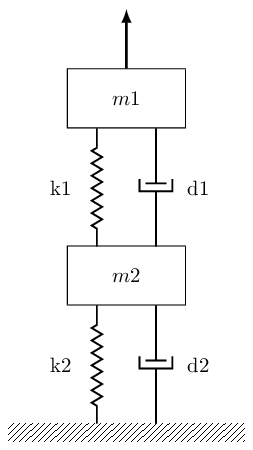

In [4]:
%%tikz -s 0.5
    
    %Import some required TeX libraries
    \usetikzlibrary{calc,patterns,decorations.pathmorphing,decorations.markings,circuits}
    
    %Define some named, styled components
    \tikzstyle{spring}=[thick,decorate,decoration={zigzag,pre length=0.3cm,post length=0.3cm,segment length=6}]
     \tikzstyle{damper}=[thick,decoration={markings, mark connection node=dmp,mark=at position 0.5 with {
     \node (dmp) [thick,inner sep=0pt,transform shape,rotate=-90,minimum width=15pt,minimum height=3pt,draw=none] {};
     \draw [thick] ($(dmp.north east)+(2pt,0)$) -- (dmp.south east) -- (dmp.south west) -- ($(dmp.north west)+(2pt,0)$); \draw [thick] ($(dmp.north)+(0,-5pt)$) -- ($(dmp.north)+(0,5pt)$);}}, decorate]
     \tikzstyle{ground}=[fill,pattern=north east lines,draw=none,minimum width=4cm,minimum height=0.3cm]

     \begin{scope}
     \node at (0,0) [draw,rectangle, minimum width=2cm,minimum height=1cm,anchor=south,,transform shape](m1) {$m1$};
      \draw [very thick, -latex](m1.north) -- +(0,1);
     \node at (0,-3) [draw,rectangle, minimum width=2cm,minimum height=1cm,anchor=south,,transform shape](m2) {$m2$};
     %\draw [very thick, -latex](m2.north) -- +(0,1);
     \draw [spring] (-0.5,-2) -- (-0.5,0) node[midway,left=0.3cm] {k1};
      \draw [damper,label=D1,] (0.5,-2) -- (0.5,0)node[midway,right=0.4cm] {d1};
      \node (ground1) at (0,-5)  [ground, anchor=north] {};
%        \draw [ground] (-1,-5) -- (1,-5);
      \draw [spring] (-0.5,-5) -- (-0.5,-3)node[midway,left=0.3cm] {k2};
 %     \draw [spring] (-0.5,-5) -- (-0.5,-3)node[draw=none,midway,left=0.3cm] {k2};
       \draw [damper] (0.5,-5) -- (0.5,-3)node[midway,right=0.4cm] {d2};

      \end{scope}

In [ ]:
#Animations?
#eg https://github.com/robbymckilliam/testablelinearsystems/blob/master/tikzfigs/masspringdampersolution.tex

### Trolley Problems

Another popular class of problem are "trolley problems".

The following example is taken from https://tex.stackexchange.com/a/342365 - with a little bit of effort, we should be able to abstract elements of this out into a higher level commands capable of creating trolley problem diagrams rather more succinctly. For example, we might try to define a "trolley" object that can be inserted into the diagram in the same way that the `spring` and `damper` elements are.

In [ ]:
%%tikz -s 0.5
\usetikzlibrary{calc,patterns,decorations.pathmorphing,decorations.markings}

%Create some reusable components

%spring
\tikzstyle{spring}=[thick,decorate,decoration={zigzag,pre length=0.3cm,post length=0.3cm,segment length=6}]

%damper
\tikzstyle{damper}=[thick,decoration={markings,  
  mark connection node=dmp,
  mark=at position 0.5 with 
  {
    \node (dmp) [thick,inner sep=0pt,transform shape,rotate=-90,minimum width=15pt,minimum height=3pt,draw=none] {};
    \draw [thick] ($(dmp.north east)+(2pt,0)$) -- (dmp.south east) -- (dmp.south west) -- ($(dmp.north west)+(2pt,0)$);
    \draw [thick] ($(dmp.north)+(0,-5pt)$) -- ($(dmp.north)+(0,5pt)$);
  }
}, decorate]

%ground
\tikzstyle{ground}=[fill,pattern=north east lines,draw=none,minimum width=0.75cm,minimum height=0.3cm,inner sep=0pt,outer sep=0pt]


%Trolley m1
\node [draw, outer sep=0pt, thick] (M) [minimum width=2cm, minimum height=1.5cm] {$m_1$};
\draw [thick, fill=white] (M.south west) ++(0.2cm,-0.125cm) circle (0.125cm)  (M.south east) ++(-0.2cm,-0.125cm) circle (0.125cm);

%Trolley m2
\node [draw, outer sep=0pt, thick] (M2) [minimum width=2cm, minimum height=1.5cm, xshift = 4cm] {$m_2$};
\draw [thick, fill=white] (M2.south west) ++(0.2cm,-0.125cm) circle (0.125cm)  (M2.south east) ++(-0.2cm,-0.125cm) circle (0.125cm);


%The wall is constructed from three components
\node (ground) [ground,anchor=north,yshift=-0.2cm,minimum width=10cm,xshift=2.03cm] at (M.south) {};
\draw (ground.north west) -- (ground.north east) -- (ground.south east) -- (ground.south west);

\node (fill) [ground,xshift=-0.15cm,minimum height = 0.3cm, minimum width = 0.3cm] at (ground.west) {};
\draw (fill.north west) -- (fill.south west) -- (fill.south east);

\node (wall) [ground, rotate=-90, minimum width=3cm,anchor=south east] at (fill.north west) {};
\draw (wall.north east) -- (wall.north west) -- (wall.south west) -- (wall.south east);


%The spring and damper are defined relative to the trolleys

%spring
\draw [spring] (M.east) -- (M2.west) node (k) [midway,above] {$k$};

%damper
\draw [damper] (wall.15) -- ($(M.north west)!(wall.15)!(M.south west)$) node [midway,yshift=0.5cm] {$b$};


%Arrows and dashed lines annotating trolleys

\draw [-latex,ultra thick] (M.north east) ++(0cm, 0.5cm) -- +(1cm,0cm) node [right] (y1) {$y_1$};
\draw [dashed] (M.north east) -- +(0cm,0.8cm);

\draw [-latex,ultra thick] (M2.north east) ++(0cm, 0.5cm) -- +(1cm,0cm) node [right] (y2) {$y_2$};
\draw [-latex,ultra thick] (M2.east) -- +(1cm,0cm) node [right] (u) {$u$};
\draw [dashed] (M2.north east) -- +(0cm,0.8cm);

Here's another take on trolley diagrams:

## Geometric Drawings

As well as creating drawings to support mechanics teaching, we can also write diagrams appropriate for use when teaching trigonometry or geometry.

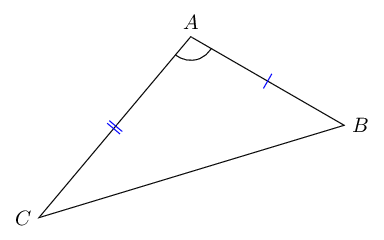

In [14]:
%%tikz -p tikz,tkz-euclide -s 0.5
%https://tex.stackexchange.com/a/183376/151162
\usetikzlibrary{calc}
\usetkzobj{all}


\coordinate (A) at (0,0);

%Define the position of B and C using relative angle and distance from A
%The angle is measured counterclockwise with zero degrees along the horizontal x-axis
\coordinate (B) at ($(A)+(330:3)$);
\coordinate (C) at ($(A)+(230:4)$);

%Join the nodes with lines, labelling each node in turn, then close the shape with the -- cycle
\draw (A) node[above]{$A$} -- (B) node[right]{$B$} -- (C) node[left]{$C$} -- cycle;

%Add in an arc to specify the angle at A
\tkzMarkAngle[size=0.4](C,A,B)

%Mark each of the sides with count lines
\tkzMarkSegment[color=blue,pos=.5,mark=||](A,C) 
\tkzMarkSegment[color=blue,pos=.5,mark=|](A,B)


In [ ]:
#Could we make that reusable?
#eg https://tex.stackexchange.com/questions/356829/reusable-tikz-picture
#so perhaps allow the angle and side length to be set?
#And maybe also the rotation of the figure?

In [ ]:
#nice geometrical drawing here: https://tex.stackexchange.com/a/217972/151162

One advantage of writing the diagrams and then constructing them automatically is that a well defined diagram "formula" can be used to gerneate a whole range of diagrams.

For example, run the following cell, observe the number of sides in the regular shape that is generated, and then change the value of `N` in the `\def\numsides{N}` statement and run the cell again.

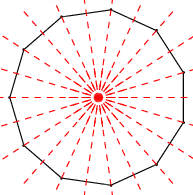

In [15]:
%%tikz -s 0.5
%https://tex.stackexchange.com/a/371351/151162
\usetikzlibrary{shapes.geometric, calc}

\def\numsides{11} % regular polygon sides
\node (a) 
[draw,  blue!0!black,rotate=90,minimum size=3cm,regular polygon, regular polygon sides=\numsides] at (0, 0) {}; 

\foreach \x in {1,2,...,\numsides}
  \fill (a.corner \x) circle[radius=.5pt];
  \foreach \x in {1,2,...,\numsides}{
  \draw [red,dashed, shorten <=-0.5cm,shorten >=-0.5cm](a.center) -- (a.side \x);
  \draw [red,dashed, shorten <=-0.5cm,shorten >=-0.5cm](a.center) -- (a.corner \x);}

### Reworking Elements of an OpenLearn Unit

As a further example, the following diagrams are inspired by the OpenLearn unit [Geometry: *2.6 Line symmetry*](http://www.open.edu/openlearn/science-maths-technology/mathematics-and-statistics/mathematics-education/geometry/content-section-2.6).

Look at the shapes below. The symmetry of the shape on the left and its relationship to the shape on the right can be thought of in two ways:

Fold the left-hand shape along the central line. Then one side lies exactly on top of the other, and gives the shape on the right.

Imagine a mirror placed along the central dotted line. The reflection in the mirror gives the other half of the shape.

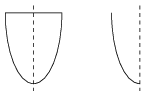

In [16]:
%%tikz -s 0.3
\def\ra{0.8};
\def\rb{2.0};
\def\rdelta{0.2};
\def\offset{\rb + 1};
\def\startangle{180};
\def\shpanglea{180};
\def\shpangleb{90};

\coordinate (origin) at (0,0);
\draw (origin) arc[start angle=\startangle,end angle=\startangle+\shpanglea, x radius=\ra, y radius=\rb] -- cycle;
\draw [dashed ] (\ra,\rdelta) -- (\ra,-\rb-\rdelta);

\path (origin) +(\offset,0) coordinate (origin2);
\draw (origin2) arc[start angle=\startangle,end angle=\startangle+\shpangleb, x radius=\ra, y radius=\rb];
\draw [dashed ] (origin2) +(\ra,\rdelta) -- +(\ra,-\rb-\rdelta);

This type of symmetry is called line symmetry.

Any isosceles triangle has line symmetry.

The dashed lines represent lines of symmetry, and each shape is said to be symmetrical about this line.

...

A shape can have more than one line of symmetry. Thus a rectangle has two lines of symmetry, an equilateral triangle has three lines of symmetry, and a square has four.

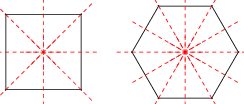

In [17]:
%%tikz --no-wrap -s 0.3

%This example demonstrates how to create a parameterised function that
% generates regular shapes with arbitrary numbers of sides and lines of symmetry highlighted

%symmetry via https://tex.stackexchange.com/a/371351/151162
\usetikzlibrary{shapes.geometric, calc}

%newcomand via https://tex.stackexchange.com/a/27281/151162
\newcommand{\DrawSymmShape}[2]{% numsides, offsetx
\def\numsides{#1}
\def\offsetx{#2}
\node (a) 
[draw,  blue!0!black,minimum size=3cm,regular polygon, regular polygon sides=\numsides] at (\offsetx, 0) {}; 

\foreach \x in {1,2,...,\numsides}
  \fill (a.corner \x) circle[radius=.5pt];
  \foreach \x in {1,2,...,\numsides}{
  \draw [red,dashed, shorten <=-0.5cm,shorten >=-0.5cm](a.center) -- (a.side \x);
  \draw [red,dashed, shorten <=-0.5cm,shorten >=-0.5cm](a.center) -- (a.corner \x);}

}

\begin{tikzpicture}

\DrawSymmShape{4}{0}
    \DrawSymmShape{6}{4}
\end{tikzpicture}